In [16]:
import sep
from astropy.nddata import CCDData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import re
from astropy.io import ascii
from astropy.table import Table, join, join_distance, vstack
from pylab import *
from astropy.io import fits
from PyAstronomy import pyasl
from matplotlib.pyplot import figure
import glob
import scipy
from scipy import (signal,stats,interpolate)
from astropy.coordinates import SkyCoord
from matplotlib.patches import Ellipse, Circle
from matplotlib.patches import Annulus
from astropy.time import Time
#from convenience_functions import show_image
import fitsio
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import fits

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [17]:
#put location of your files
dir="/home/osama/Downloads/ARIES/photometry/"
fnames1= sorted(glob.iglob(dir+'/DATA_1.3mDFOT_Osama/science_aligned_*.fits'),key=lambda f: int(re.sub('\D', '', f)))

In [18]:
#fnames1

In [71]:
# read image into standard 2-d numpy array
agn_s1 =[]
agn_s2 =[]
agn_s3 =[]
s1_s2 = []
s2_s3 = []
s3_s1 = []
frame = []
dummy = 1
time = []

m_agn_mstarerr1=[]
m_agn_mstarerr2=[]
m_agn_mstarerr3=[]

s1err_s2err=[]
s2err_s3err=[]
s3err_s1err=[]


var01=[]
var02=[]
var03=[]
var12=[]
var23=[]
var31=[]



for f in fnames1:
    frame.append(dummy)
    dummy+=1
    objects_x=[]
    objects_y=[]
    objects_x2=[]
    objects_y2=[]
    datasub=[]
    objects_a=[]
    objects_b=[]
    objects_th=[]
    objects_npix=[]
    objects_xmin=[]
    objects_xmax=[]
    objects_ymin=[]
    objects_ymax=[]
    bkgdata=[]

    data = fitsio.read(f)
    data = data.astype(np.float64)
    #data=data-fitsio.read(ref)
    #data = data.byteswap().newbyteorder()
    bkg = sep.Background(data)
    bkgdata.append(bkg)
    data_sub = data - bkg
    datasub.append(data_sub)
    #print(bkg.globalrms)
    objects = sep.extract(data_sub, 5, err=bkg.globalrms, minarea=8)
    objects_x.append(objects['x'])
    objects_y.append(objects['y'])
    objects_x2.append(objects['x2'])
    objects_y2.append(objects['y2'])
    objects_a.append(objects['a'])
    objects_b.append(objects['b'])
    objects_th.append(objects['theta'])
    objects_npix.append(objects['tnpix'])
    objects_xmin.append(objects['xmin'])
    objects_xmax.append(objects['xmax'])
    objects_ymin.append(objects['ymin'])
    objects_ymax.append(objects['ymax'])
    print(len(objects))
    xpix = []
    ypix = []
    for j in range(len(objects)):
        xpix.append((objects_xmax[0][j]+objects_xmin[0][j])/2)
        ypix.append((objects_ymax[0][j]+objects_ymin[0][j])/2)
 


    #Calculate the flux of each object for individual fits file
    flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],2.0, err=bkg.globalrms, gain=1.0)
    
    indi_s1 = []
    for k in range(len(objects)):
        if xpix[k]>830 and xpix[k]<860 and ypix[k]>977 and ypix[k]<1007:
            indi_s1.append(k)
            
    object_no = []
    #for one fits file
    for i in indi_s1:
        object_no.append(i)
        m_s1 = (-2.5*(np.log10(flux[i]/300))+25) 
        m_s1err = (abs(-1.085*(fluxerr[i]/flux[i])))
        print("Standard star 1 : object {:d} xpixel={:.2f} ypixels={:.2f} flux = {:.2f} +/- {:.2f}".format(i, xpix[i], ypix[i], flux[i], fluxerr[i]))
    
    indi_s2 = []
    for k in range(len(objects)):
        if xpix[k]>847 and xpix[k]<877 and ypix[k]>1162 and ypix[k]<1192:
            indi_s2.append(k)
            
    object_no = []
    #for one fits file
    for i in indi_s2:
        object_no.append(i)
        m_s2 = (-2.5*(np.log10(flux[i]/300))+25) 
        m_s2err = (abs(-1.085*(fluxerr[i]/flux[i])))
        print("Standard star 2 : object {:d} xpixel={:.2f} ypixels={:.2f} flux = {:.2f} +/- {:.2f}".format(i, xpix[i], ypix[i], flux[i], fluxerr[i]))
    
    indi_s3 = []
    for k in range(len(objects)):
        if xpix[k]>1041 and xpix[k]<1071 and ypix[k]>1141 and ypix[k]<1161:
            indi_s3.append(k)
            
    object_no = []
    #for one fits file
    for i in indi_s3:
        object_no.append(i)
        m_s3 = (-2.5*(np.log10(flux[i]/300))+25) 
        m_s3err = (abs(-1.085*(fluxerr[i]/flux[i])))
        print("Standard star 3 : object {:d} xpixel={:.2f} ypixels={:.2f} flux = {:.2f} +/- {:.2f}".format(i, xpix[i], ypix[i], flux[i], fluxerr[i]))
    
    indi_agn = []
    for k in range(len(objects)):
        if xpix[k]>971 and xpix[k]<1091 and ypix[k]>935 and ypix[k]<965:
            indi_agn.append(k)
            
    object_no = []
    #for one fits file
    for i in indi_agn:
        object_no.append(i)
        m_agn = (-2.5*(np.log10(flux[i]/300))+25) 
        m_agnerr = (abs(-1.085*(fluxerr[i]/flux[i])))
        print("AGN : object {:d}: xpixel={:.2f} ypixels={:.2f} flux = {:.2f} +/- {:.2f}".format(i, xpix[i], ypix[i], flux[i], fluxerr[i]))
    
    print ("S1 Magnitude :",m_s1,"+/-",m_s1err)
    print ("S2 Magnitude :",m_s2,"+/-",m_s2err)
    print ("S3 Magnitude :",m_s3,"+/-",m_s3err)
    print ("AGN Magnitude :",m_agn,"+/-",m_agnerr)
    
    mdiff_agnstar1 = m_agn - m_s1
    mdiff_agnstar2 = m_agn - m_s2
    mdiff_agnstar3 = m_agn - m_s3
    agn_s1.append(mdiff_agnstar1)
    agn_s2.append(mdiff_agnstar2)
    agn_s3.append(mdiff_agnstar3)

    mdiff_agnstarerr1 = np.sqrt(((m_agnerr)**2) - ((m_s1err)**2))
    mdiff_agnstarerr2 = np.sqrt(((m_agnerr)**2) - ((m_s2err)**2))
    mdiff_agnstarerr3 = np.sqrt(((m_agnerr)**2) - ((m_s3err)**2))
    
    mdiff_star12 = m_s1 - m_s2
    mdiff_starerr12 = np.sqrt(((m_s1err)**2) - ((m_s2err)**2))
    
    mdiff_star23 = m_s2 - m_s3
    mdiff_starerr23 = np.sqrt(((m_s2err)**2) - ((m_s3err)**2))
    
    mdiff_star31 = m_s3 - m_s1
    mdiff_starerr31 = np.sqrt(((m_s3err)**2) - ((m_s1err)**2))
    
    s1_s2.append(mdiff_star12)
    s2_s3.append(mdiff_star23)
    s3_s1.append(mdiff_star31)
    
    m_agn_mstarerr1.append(mdiff_agnstarerr1)
    m_agn_mstarerr2.append(mdiff_agnstarerr2)
    m_agn_mstarerr3.append(mdiff_agnstarerr3)

    
    s1err_s2err.append(mdiff_starerr12 )
    s2err_s3err.append(mdiff_starerr23 )
    s3err_s1err.append(mdiff_starerr23 )
    
    
    
    
    from astropy.time import TimezoneInfo
    import astropy.units as u
    #DFOT time is in utc so converting it in actual time +5:30hrs

    time_phot=[]
    #f5=[*f5[:6],*f5[7:]]
    hdu=fits.open(f)
    head=hdu[0].header
    time_phot.append(head["FRAME"])
    #print(time_phot)
    from datetime import datetime
    corrected_timestamps = []

    for timestamp in time_phot:
        corrected_timestamp = timestamp.replace('"', '')
        datetime_obj = datetime.strptime(corrected_timestamp, '%Y-%m-%dT%H:%M:%S.%f')
        formatted_timestamp = datetime_obj.strftime('%Y-%m-%dT%H:%M:%S.%f')
        corrected_timestamps.append(formatted_timestamp)

    #print(corrected_timestamps)

    import astropy.units as u
    utc_plus_one_hour = TimezoneInfo(utc_offset=5*u.hour+30*u.min)
    timep = Time(corrected_timestamps, format='isot', scale='local')
    #print(timep)
    time10=(Time(timep) + 5*u.hour +30*u.min ).mjd
    #print(time10,len(time10))
    time.append(time10)
    
'''   
    Sigma01=np.var(agn_s1)
    #print("AGN_S1 varience in magnitude/Sigma1:",Sigma01)
    Sigma02=np.var(agn_s2)
    #print("AGN_S2 varience in magnitude/Sigma2:",Sigma02)
    Sigma03=np.var(agn_s3)
    #print("AGN_S3 varience in magnitude/Sigma3:",Sigma03)

    Sigma12=np.var(s1_s2)
    #print("S1_S2 varience in magnitude:",Sigma12)
    Sigma23=np.var(s2_s3)
    #print("S1_S2 varience in magnitude:",Sigma23)
    Sigma31=np.var(s3_s1)
    #print("S1_S2 varience in magnitude:",Sigma31)
    
    
    epsilon01=np.var(mdiff_agnstarerr1)
    epsilon02=np.var(mdiff_agnstarerr2)
    epsilon03=np.var(mdiff_agnstarerr3)
    
    epsilon12=np.var(mdiff_starerr12)
    epsilon23=np.var(mdiff_starerr23)
    epsilon31=np.var(mdiff_starerr31)
    
variablity01=np.sqrt[(Sigma01)**2-(epsilon01)**2]
variablity02=np.sqrt[(Sigma02)**2-(epsilon02)**2]
variablity03=np.sqrt[(Sigma03)**2-(epsilon03)**2]
    
    
variablity12=np.sqrt[(Sigma12)**2-(epsilon12)**2]
variablity23=np.sqrt[(Sigma23)**2-(epsilon23)**2]
variablity31=np.sqrt[(Sigma31)**2-(epsilon31)**2]
    
var01.append(variablity01)
print(var01)
    
'''   
    
    
    


138
Standard star 1 : object 62 xpixel=845.50 ypixels=992.00 flux = 73.40 +/- 8.57
Standard star 2 : object 76 xpixel=862.00 ypixels=1177.50 flux = 73.13 +/- 8.55
Standard star 3 : object 74 xpixel=1056.00 ypixels=1146.50 flux = 71.85 +/- 8.48
AGN : object 58: xpixel=986.50 ypixels=950.00 flux = 0.25 +/- 0.50
S1 Magnitude : 26.528541025773055 +/- 0.1266419525156306
S2 Magnitude : 26.532551410767816 +/- 0.12687605742913322
S3 Magnitude : 26.55170305422043 +/- 0.1280000106574178
AGN Magnitude : 32.688350140762 +/- 2.1608286437874074
138
Standard star 1 : object 65 xpixel=845.00 ypixels=991.50 flux = 73.22 +/- 8.56
Standard star 2 : object 80 xpixel=862.50 ypixels=1177.50 flux = 72.22 +/- 8.50
Standard star 3 : object 78 xpixel=1053.50 ypixels=1147.00 flux = 72.36 +/- 8.51
AGN : object 60: xpixel=986.50 ypixels=949.50 flux = 0.29 +/- 0.54
S1 Magnitude : 26.53126253979871 +/- 0.12680078870443326
S2 Magnitude : 26.546094236893698 +/- 0.12766983395440723
S3 Magnitude : 26.544131721645744 +/-

/tmp/ipykernel_6242/519571433.py:151: RuntimeWarning: invalid value encountered in sqrt
  mdiff_starerr12 = np.sqrt(((m_s1err)**2) - ((m_s2err)**2))
/tmp/ipykernel_6242/519571433.py:154: RuntimeWarning: invalid value encountered in sqrt
  mdiff_starerr23 = np.sqrt(((m_s2err)**2) - ((m_s3err)**2))


163
Standard star 1 : object 73 xpixel=846.50 ypixels=991.00 flux = 73.29 +/- 8.56
Standard star 2 : object 92 xpixel=864.00 ypixels=1178.00 flux = 72.50 +/- 8.51
Standard star 3 : object 89 xpixel=1057.00 ypixels=1147.50 flux = 72.87 +/- 8.54
AGN : object 67: xpixel=987.00 ypixels=950.00 flux = 0.30 +/- 0.55
S1 Magnitude : 26.53019340711913 +/- 0.12673830778246337
S2 Magnitude : 26.541943033634286 +/- 0.12742593496566534
S3 Magnitude : 26.53645761578809 +/- 0.12710444698393908
AGN Magnitude : 32.503162051817554 +/- 1.9839409945732283
203
Standard star 1 : object 93 xpixel=842.50 ypixels=991.50 flux = 76.80 +/- 8.76
Standard star 2 : object 115 xpixel=861.00 ypixels=1176.00 flux = 74.53 +/- 8.63
Standard star 3 : object 111 xpixel=1064.50 ypixels=1143.00 flux = 74.80 +/- 8.65
AGN : object 85: xpixel=986.50 ypixels=951.00 flux = 0.29 +/- 0.54
S1 Magnitude : 26.479348622051127 +/- 0.12380519718896879
S2 Magnitude : 26.51193156248581 +/- 0.12567690158470818
S3 Magnitude : 26.5081085582902

/tmp/ipykernel_6242/519571433.py:157: RuntimeWarning: invalid value encountered in sqrt
  mdiff_starerr31 = np.sqrt(((m_s3err)**2) - ((m_s1err)**2))


170
Standard star 1 : object 76 xpixel=845.50 ypixels=990.50 flux = 73.87 +/- 8.60
Standard star 2 : object 96 xpixel=865.00 ypixels=1178.00 flux = 73.21 +/- 8.56
Standard star 3 : object 93 xpixel=1057.50 ypixels=1147.50 flux = 73.61 +/- 8.58
AGN : object 71: xpixel=987.50 ypixels=949.50 flux = 0.29 +/- 0.54
S1 Magnitude : 26.521560345639543 +/- 0.12623543804212906
S2 Magnitude : 26.531446241538173 +/- 0.1268114505105652
S3 Magnitude : 26.52546066850433 +/- 0.12646238128543255
AGN Magnitude : 32.54779308200761 +/- 2.0251450407055516
177
Standard star 1 : object 80 xpixel=847.50 ypixels=991.50 flux = 74.93 +/- 8.66
Standard star 2 : object 103 xpixel=865.00 ypixels=1178.00 flux = 75.30 +/- 8.68
Standard star 3 : object 100 xpixel=1068.00 ypixels=1147.00 flux = 73.65 +/- 8.58
AGN : object 73: xpixel=987.00 ypixels=950.50 flux = 0.28 +/- 0.53
S1 Magnitude : 26.5062326477869 +/- 0.1253475110628422
S2 Magnitude : 26.500829628744356 +/- 0.12503601133907302
S3 Magnitude : 26.524866505264235 

'   \n    Sigma01=np.var(agn_s1)\n    #print("AGN_S1 varience in magnitude/Sigma1:",Sigma01)\n    Sigma02=np.var(agn_s2)\n    #print("AGN_S2 varience in magnitude/Sigma2:",Sigma02)\n    Sigma03=np.var(agn_s3)\n    #print("AGN_S3 varience in magnitude/Sigma3:",Sigma03)\n\n    Sigma12=np.var(s1_s2)\n    #print("S1_S2 varience in magnitude:",Sigma12)\n    Sigma23=np.var(s2_s3)\n    #print("S1_S2 varience in magnitude:",Sigma23)\n    Sigma31=np.var(s3_s1)\n    #print("S1_S2 varience in magnitude:",Sigma31)\n    \n    \n    epsilon01=np.var(mdiff_agnstarerr1)\n    epsilon02=np.var(mdiff_agnstarerr2)\n    epsilon03=np.var(mdiff_agnstarerr3)\n    \n    epsilon12=np.var(mdiff_starerr12)\n    epsilon23=np.var(mdiff_starerr23)\n    epsilon31=np.var(mdiff_starerr31)\n    \nvariablity01=np.sqrt[(Sigma01)**2-(epsilon01)**2]\nvariablity02=np.sqrt[(Sigma02)**2-(epsilon02)**2]\nvariablity03=np.sqrt[(Sigma03)**2-(epsilon03)**2]\n    \n    \nvariablity12=np.sqrt[(Sigma12)**2-(epsilon12)**2]\nvariablity2

In [72]:
m_agn_mstarerr1

[2.157114332545949,
 2.005926113177549,
 1.979888701742764,
 1.9944785753994823,
 2.013533305017584,
 2.4090560563554138,
 2.1332062596563635,
 2.120995103360811,
 2.0848081867277126,
 2.1664057918387503,
 2.3081573837196148,
 2.0805232887653293,
 2.0212068301083397,
 2.04808229161722,
 2.0201585392808155,
 2.0319457269640737]

In [73]:
s1err_s2err

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.009715493889982165,
 0.00954836238387003,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.008831443713490336,
 0.02050439809552882,
 0.012761164360480278]

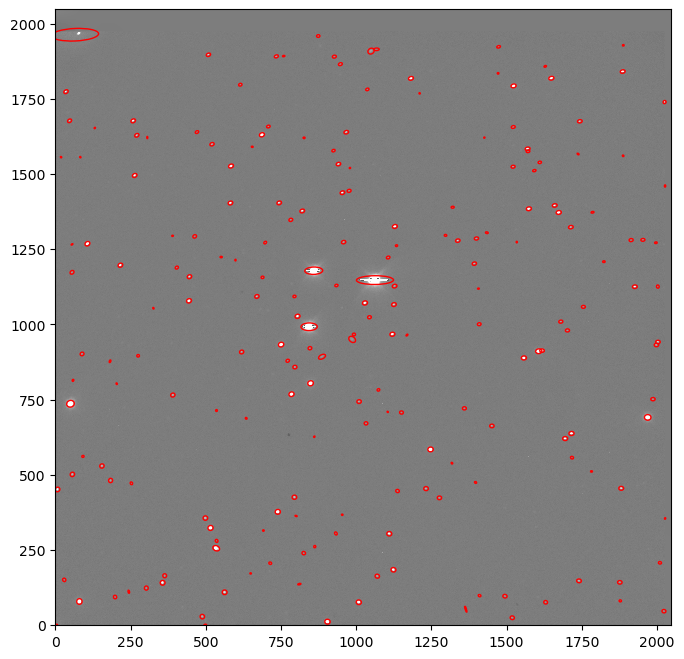

<Figure size 500x300 with 0 Axes>

In [74]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
plt.figure(figsize=(5, 3))


# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)



<Figure size 3000x2400 with 0 Axes>

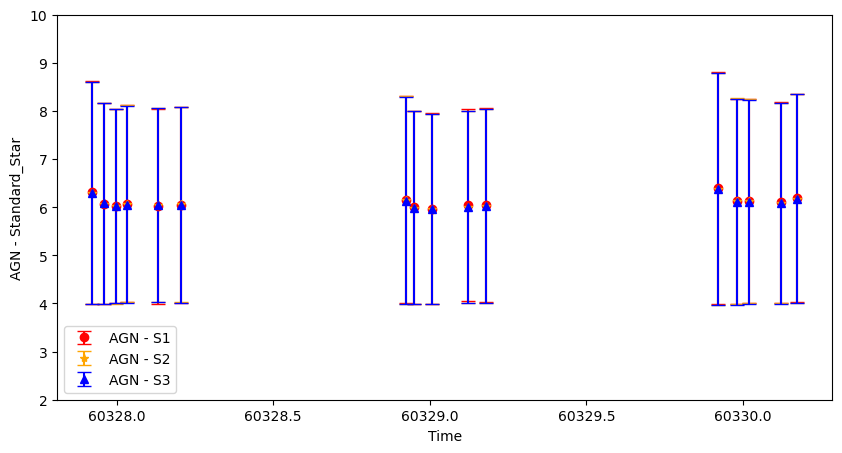

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
fig =  plt.figure(dpi=300)
plt.figure(figsize=(10,5))

#ax = fig.add_axes([0,0,1,1])
ax = plt.gca()

ax.errorbar(time,agn_s1,m_agn_mstarerr1,label="AGN - S1",fmt='o',color='red',capsize=5)
ax.errorbar(time, agn_s2,m_agn_mstarerr2, label="AGN - S2",fmt='*',color='orange',capsize=5)
ax.errorbar(time, agn_s3,m_agn_mstarerr2,label="AGN - S3",fmt='^',color='blue',capsize=5)


plt.legend(loc='best')
ax.set_ylabel("AGN - Standard_Star")
ax.set_xlabel("Time")
ax.set_ylim(2,10)
plt.show()


In [76]:
#s1_s2

In [77]:
#time

<Figure size 3000x2400 with 0 Axes>

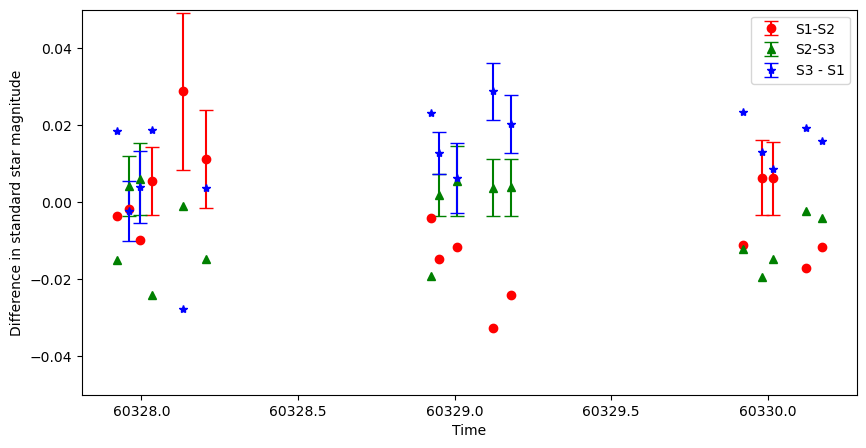

In [81]:

%matplotlib inline
fig =  plt.figure(dpi=300)
plt.figure(figsize=(10,5))
#ax = fig.add_axes([0,0,1,1])
ax = plt.gca()
ax.errorbar(time,s1_s2,s1err_s2err,label="S1-S2",fmt='o',color='red',capsize=5)
#ax.plot(time,s1_s2,label="S1 - S2")
ax.errorbar(time,s2_s3,s2err_s3err,label="S2-S3",fmt='^',color='green',capsize=5)
#ax.plot(time,s2_s3,label="S2 - S3")
ax.errorbar(time,s3_s1,s3err_s1err,label="S3 - S1",fmt='*',color='blue',capsize=5)
ax.legend(loc='best')

#ax.scatter(time,s3_s1)
#ax.errorbar(time,s3_s1, s3err_s1err)
ax.set_ylabel("Difference in standard star magnitude")
ax.set_xlabel("Time")
ax.set_ylim(-0.05,0.05)

plt.show()
